In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Visual_Memory") #Executando na pasta Visual_Memory
import sys
sys.path.append("./include")
sys.path.append("./src")
sys.path.append("./iPython")
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [4]:
# The standard libraries used in the visual memory system.
import time # Libraries used for time management.
import numpy as np # Used for matrix calculations.

In [5]:
# Used class developed by RoboFEI-HT.
#ini-iPython - Usando Classe KalmanFilter como instanciação 
os.system("sed -i 's/_//g' ./iPython/Basic.py")
os.system("sed -i 's/init/__init__/g' ./iPython/Basic.py")
os.system("sed -i 's/@abstractmethod//g' ./iPython/Basic.py")
#end-iPython
from Basic import * # Standard and abstract class.
from Speeds import * # Class responsible for managing the robot"s possible speeds (me).
sym.init_printing() #debug-iPython

# Class to KalmanFilter
Class responsible for implementing kalman filter methods.
doxygen-iPython

In [6]:
#des-iPython class KalmanFilter(Basic):
#ini-tab -> Iniciando código classe
#des-iPython __metaclass__ = ABCMeta

---- Variables ----

# _parameters
Variable used to instantiate class responsible for robot speed.
doxygen-iPython

In [7]:
_parameters = None #self-iPython _parameters

# _speeds
Variable used to instantiate class responsible for robot speed.
doxygen-iPython

In [8]:
_speeds = None #self-iPython _speeds

# _t
Time variable used in kalman filter.
doxygen-iPython

In [9]:
_t = None #self-iPython _t

# _predictedstate
Variable used to make predictions from observations.
doxygen-iPython

In [10]:
_predictedstate = { } #self-iPython _predictedstate

# _state
Variable used to predict the position of the object at the current instant.
doxygen-iPython

In [11]:
_state = { } #self-iPython _state

Matrix used in kalman filter.
doxygen-iPython

In [12]:
_A = None; _B = None; _R = None; _C = None; _Q = None

Status variables.
doxygen-iPython

In [13]:
_p_x = None; _p_y = None; _v_x = None; _v_y = None; _a_x = None; _a_y = None; _b_x = None; _b_y = None

In [14]:
#ini-iPython

# ------- Lista de funções herdadas -------



# ------- Lista variaveis herdadas -------

#self-iPython _bkb
#self-iPython _conf

# ------- Lista de funções -------

#self-iPython _reset
#self-iPython __predictNow
#self-iPython __predictTime
#self-iPython predict
#self-iPython update


# ------- Lista de variáveis -------

#self-iPython _A
#self-iPython _B
#self-iPython _R
#self-iPython _C
#self-iPython _Q

#self-iPython _p_x
#self-iPython _p_y
#self-iPython _v_x
#self-iPython _v_y
#self-iPython _a_x
#self-iPython _a_y
#self-iPython _b_x
#self-iPython _b_y

#end-iPython - Fim listas

# _reset
doxygen-iPython

In [15]:
#eself-iPython _reset
#edes-iPython def _reset(self):
def _reset( ):
    global _t, _state, _predictedstate #debug-iPython
    global _A, _B, _R, _C, _Q #debug-iPython
    global _p_x, _p_y, _v_x, _v_y, _a_x, _a_y #debug-iPython
    # Creating the Kalman Filter Matrix
    _A = sym.Matrix([
            [1, 0, _t, 0, 0.5*_t**2, 0],
            [0, 1, 0, _t, 0, 0.5*_t**2],
            [0, 0, 1, 0, _t, 0],
            [0, 0, 0, 1, 0, _t],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1],
        ])

    _B = sym.Matrix([
            [-_t, 0, _p_x, _p_y, 0],
            [0, -_t, _p_y, -_p_x, 0],
            [0, 0, _v_x, _v_y, 0],
            [0, 0, _v_y, -_v_x, 0],
            [0, 0, _a_x, _a_y, 0],
            [0, 0, _a_y, -_a_x, 0],
        ])

    _R = sym.Matrix(sym.Identity(6))

    _C = sym.Matrix([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
        ])

    _Q = sym.Matrix(sym.Identity(2)*_parameters["vision_error"])


    # Initial state
    _predictedstate["x"] = sym.Matrix([0, 0, 0, 0, 0, 0])
    _predictedstate["covariance"] = sym.Matrix(sym.Identity(6)*1000)
    _predictedstate["time"] = -1

    _state = copy(_predictedstate) #self-iPython _reset

In [16]:
#ini-iPython

## Teste _reset

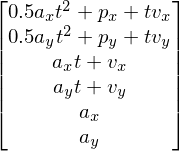

In [17]:
_t = sym.symbols("t")

_p_x, _p_y = sym.symbols("p_x, p_y")
_v_x, _v_y = sym.symbols("v_x, v_y")
_a_x, _a_y = sym.symbols("a_x, a_y")

_parameters = {}
_parameters["vision_error"] = 1

_reset( )

_state["x"], _state["covariance"], _A, _B, _R, _C, _Q, _B.subs([
    [_p_x, 1]
])
_A*sym.Matrix([
    [_p_x],
    [_p_y],
    [_v_x],
    [_v_y],
    [_a_x],
    [_a_y],
])

In [18]:
_A = _parameters = None
_t = _p_x = _p_y = _v_x = _v_y = _a_x = _a_y = None
#end-iPython

# Constructor Class
Responsible for starting the matrices of kalman patterns.
doxygen-iPython

In [19]:
obj = "Test" #debug-iPython
#des-iPython @abstractmethod
#des-iPython def __init__(self, s, obj):
#ini-tab -> Criando construtor

# Instantiating parent class
#edes-iPython super(KalmanFilter,self).__init__("Kalman Filter", obj)
basic = Basic("Kalman Filter", obj)

# Creating standard parameters and reading
_parameters = {
    "vision_error": 0.1,
}

#edes-iPython _parameters = _conf.readVariables(_parameters)
_parameters = basic.conf.readVariables(_parameters)

# Variable to robot speed
#edes-iPython _speeds = s
_speeds = Speeds( )

_t = sym.symbols("t") # Declaring variable time

# Status variables
_p_x, _p_y = sym.symbols("p_x, p_y")
_v_x, _v_y = sym.symbols("v_x, v_y")
_a_x, _a_y = sym.symbols("a_x, a_y")

KALMAN FILTER - TEST section not found!


In [20]:
#end-tab -> Finalizando construtor

In [21]:
#ini-iPython

## Teste construtor

{'vision_error': 0.1}


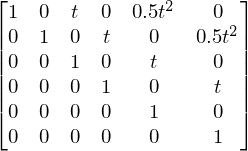

In [22]:
_reset( )
print _parameters
basic.end( )
_A
#end-iPython

# __predictNow
Performs the prediction using the current instant in time to determine the new state.
doxygen-iPython

In [23]:
# #eself-iPython __predictNow
# #edes-iPython def __predictNow(self, tnow = None, movements = None):
# def __predictNow(tnow = None, movements = None):
#     print "Executou predictNow", tnow, movements #debug-iPython
#     global _t, _state #debug-iPython
#     if _state["time"] != -1: # Checking if you can hear at least one measurement.
#         # Time that will be used for calculation
#         #edes-iPython tnow = time.time()
#         tnow = 1
#     else:
#         tnow = -1

#     # Calculating states
#     _state["x"] = (
#         _A*_state["x"] # A * x
#     ).subs([
#         [_t, tnow - _state["time"]], # Inserting delta time
#     ])

#     _state["x"] = (
#         _B*_speeds[movements]["U"] # B * U
#     ).subs([
#         [_t, tnow - _state["time"]], # Inserting delta time
        
#         # State Variables
#         [_p_x, _state["x"][0]],
#         [_p_y, _state["x"][1]],
#         [_v_x, _state["x"][2]],
#         [_v_y, _state["x"][3]],
#         [_a_x, _state["x"][4]],
#         [_a_y, _state["x"][5]],
#     ])

#     # Calculating covariance
#     _state["covariance"] = (
#         _A*_state["covariance"]*sym.transpose(_A) + _R*_speeds[movements]["R"] # A * covariance * A.T + R
#     ).subs([
#         [_t, tnow - _state["time"]],
#     ])
    
#     _state["x"] = sym.Matrix(_state["x"])
#     for x in xrange(2,len(_state["x"])):
#         if abs(_state["x"][x]) < _parameters["vision_error"]/2:
#             _state["x"][x] = 0
#         if (x == 2 or x == 3) and _state["x"][x] == 0:
#             _state["x"][x+2] = 0

#     _state["time"] = tnow #self-iPython __predictNow

In [24]:
#ini-iPython

## Teste __predictNow

In [25]:
# __predictNow(movements = 0)
# _state["x"]
# #end-iPython

Executou predictNow None 0


KeyError: 'U'

# __predictTime
Uses a current instant in time and updates the observation and the current state.
doxygen-iPython

In [29]:
#eself-iPython __predictTime
#edes-iPython def __predictTime(self, tnow = None, movements = None):
def __predictTime(tnow = None, movements = None):
    print "Executou predictTime", tnow, movements #debug-iPython
    tnow = 1 #debug-iPython
    
    if _predictedstate["time"] == -1: # Checking if you can hear at least one measurement.
        _predictedstate["time"] = tnow #self-iPython __predictTime
        
    # Calculating stop time (speed equal to zero)
    times = [tnow]
    for i in xrange(2,4):
        a = -_predictedstate["x"][i]/_predictedstate["x"][i+2]
        if a == sym.nan or a == sym.zoo or a < 0 :
            times.append(tnow)
        else:
            times.append(float(_predictedstate["time"] + a))
    while tnow > min([n for n in times if n>=0]):
        __predictTime(tnow=min([n for n in times if n>0]), movements=movements)
        times = [tnow]
        for i in xrange(2,4):
            a = -_predictedstate["x"][i]/_predictedstate["x"][i+2]
            if a == sym.nan or a == sym.zoo:
                times.append(tnow)
            else:
                times.append(float(_predictedstate["time"] + a))
        
        
    
    # Calculating states
    _predictedstate["x"] = (
        _A*_predictedstate["x"] # A * x
    ).subs([
        [_t, tnow - _predictedstate["time"]], # Inserting delta time
    ])

    _predictedstate["x"] = (
        _B*_speeds[movements]["x_speed"] # B * U
    ).subs([
        [_t, tnow - _predictedstate["time"]], # Inserting delta time
        
        # State Variables
        [_p_x, _predictedstate["x"][0]],
        [_p_y, _predictedstate["x"][1]],
        [_v_x, _predictedstate["x"][2]],
        [_v_y, _predictedstate["x"][3]],
        [_a_x, _predictedstate["x"][4]],
        [_a_y, _predictedstate["x"][5]],
    ])

    # Calculating covariance
#     print _A.shape, _predictedstate["covariance"].shape, _R.shape, _speeds[movements]["R"].shape
    _predictedstate["covariance"] = (
        _A*_predictedstate["covariance"]*sym.transpose(_A) + _R*_speeds[movements]["R"] # A * covariance * A.T + R
    ).subs([
        [_t, tnow - _predictedstate["time"]],
    ])
    
    # Resetting acceleration if speed equals zero
    _predictedstate["x"] = sym.Matrix(_predictedstate["x"])
    for x in xrange(len(_predictedstate["x"])):
#         print x, "Testando", _predictedstate["x"][x]
        if x != 2 and x != 3 and abs(_predictedstate["x"][x]) < _parameters["vision_error"]/2:
#             print "Foi"
            _predictedstate["x"][x] = 0.0
        elif abs(_predictedstate["x"][x]) < _parameters["vision_error"]/2:
#             print "Foi"
            _predictedstate["x"][x] = 0.0
            _predictedstate["x"][x+2] = 0.0

    _predictedstate["time"] = tnow
    
    _state = copy(_predictedstate["time"])

#ini-iPython

## Teste __predictTime

__predictTime(movements = 0)
_state["x"]
#end-iPython

Executou predictTime None 0


ShapeError: Matrices size mismatch.

# predict
.
doxygen-iPython

In [ ]:
#eself-iPython predict
#edes-iPython def predict(self, tnow = None, movements = None):
def predict(tnow = None, movements = None):
    {
        (float, int): __predictTime,
        (type(None), int): __predictNow,
    }[(type(tnow), type(movements))](tnow, movements) #self-iPython predict

In [ ]:
#ini-iPython

## Teste predict

In [ ]:
predict(movements=0)
#end-iPython

# update
.
doxygen-iPython

In [ ]:
#eself-iPython update
#edes-iPython def update(self, data):
def update(data):
    global _predictedstate #debug-iPython
    # Predicting value in observation time.
    predict(data["time"], data["movement"])
    
    
    k = _predictedstate["covariance"] * sym.transpose(_C) * sym.inv_quick( # covariance*C.T*(_)^(-1)
        _C * _predictedstate["covariance"] * sym.transpose(_C) + _Q # C*covariance*C.T + Q
    )
    
    z = sym.Matrix(data["pos"])
    
    _predictedstate["x"] = _predictedstate["x"] + k*(z - _C*_predictedstate["x"])
    _predictedstate["covariance"] = (sym.Matrix(sym.Identity(6)) - k*_C) * _predictedstate["covariance"]
    
    
    # Resetting acceleration if speed equals zero
    _predictedstate["x"] = sym.Matrix(_predictedstate["x"])
    for x in xrange(len(_predictedstate["x"])):
        if x != 2 and x != 3 and abs(_predictedstate["x"][x]) < _parameters["vision_error"]/2:
            _predictedstate["x"][x] = 0.0
        elif abs(_predictedstate["x"][x]) < _parameters["vision_error"]/2:
            _predictedstate["x"][x] = 0.0
            _predictedstate["x"][x+2] = 0.0
    
    _state = copy(_predictedstate)
    
    #self-iPython update

In [ ]:
#ini-iPython

## Teste update

In [ ]:
data = {
    "target": 1,
    "pos": [0, 0],
    "time": 1.0,
    "movement": 1
}
update(data)
#end-iPython

In [ ]:
#end-tab -> Finalizando classe

In [ ]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [ ]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [ ]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [ ]:
#ini-iPython

## Teste nova_funcao

In [ ]:

#end-iPython

In [ ]:
#end-iPython